In [1]:
import numpy as np
import math
import copy

In [2]:
EPS = 1.23456789e-14

In [3]:
numSeeds = 24
radius = 100
points = radius * np.random.random((numSeeds, 2))


No handles with labels found to put in legend.


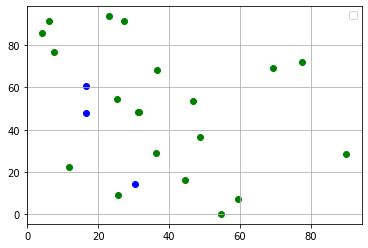

In [4]:
import matplotlib.pyplot as plt
import matplotlib.tri
import matplotlib.collections

fig, ax = plt.subplots()
ax.scatter(points[4:,0], points[4:,1], c="green")
ax.scatter(points[0:3,0], points[:3,1], c="blue")


ax.legend()
ax.grid(True)

plt.show()

In [5]:

triangles = [] # cells
edge2Triangles = {} # edge to triangle(s) map
boundaryEdges = set()
appliedBoundaryEdges = None
holes = None

    
# compute center of gravity
cg =  np.mean(points, axis=0)

In [6]:
points

array([[16.69590267, 60.69049803],
       [16.71457297, 47.96858863],
       [30.31161388, 14.47789456],
       [13.53759085, 34.9715317 ],
       [44.65792711, 16.27325705],
       [ 6.04929169, 91.28124483],
       [90.13946491, 28.4306344 ],
       [69.51271969, 69.32096076],
       [36.59782248, 68.35260152],
       [25.38927808, 54.62942498],
       [27.32204331, 91.24244543],
       [31.64345326, 48.56794949],
       [54.84585679,  0.2745848 ],
       [25.48055171,  9.39954251],
       [77.65048468, 71.90175392],
       [59.40983705,  7.3483718 ],
       [ 4.15726201, 85.78854613],
       [11.8546228 , 22.4985768 ],
       [48.83068245, 36.54333572],
       [23.0812103 , 93.66103656],
       [31.35034457, 48.55143081],
       [36.3228112 , 28.8701366 ],
       [ 7.64889834, 76.93998116],
       [46.6841966 , 53.70290757]])

In [7]:
# sort
def distanceSquare(pt):
      d = pt - cg
      return np.dot(d, d)
points=np.array(sorted(points,key = distanceSquare))

In [8]:
points

array([[31.64345326, 48.56794949],
       [31.35034457, 48.55143081],
       [25.38927808, 54.62942498],
       [46.6841966 , 53.70290757],
       [16.71457297, 47.96858863],
       [48.83068245, 36.54333572],
       [36.3228112 , 28.8701366 ],
       [36.59782248, 68.35260152],
       [16.69590267, 60.69049803],
       [13.53759085, 34.9715317 ],
       [44.65792711, 16.27325705],
       [30.31161388, 14.47789456],
       [11.8546228 , 22.4985768 ],
       [ 7.64889834, 76.93998116],
       [25.48055171,  9.39954251],
       [69.51271969, 69.32096076],
       [27.32204331, 91.24244543],
       [23.0812103 , 93.66103656],
       [59.40983705,  7.3483718 ],
       [ 4.15726201, 85.78854613],
       [77.65048468, 71.90175392],
       [ 6.04929169, 91.28124483],
       [54.84585679,  0.2745848 ],
       [90.13946491, 28.4306344 ]])

No handles with labels found to put in legend.


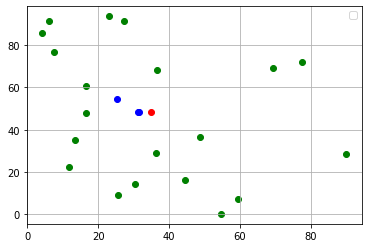

In [9]:
fig, ax = plt.subplots()
ax.scatter(points[4:,0], points[4:,1], c="green")
ax.scatter(points[0:3,0], points[:3,1], c="blue")
ax.scatter(cg[0], cg[1], c="red")

ax.legend()
ax.grid(True)

plt.show()

In [10]:
points

array([[31.64345326, 48.56794949],
       [31.35034457, 48.55143081],
       [25.38927808, 54.62942498],
       [46.6841966 , 53.70290757],
       [16.71457297, 47.96858863],
       [48.83068245, 36.54333572],
       [36.3228112 , 28.8701366 ],
       [36.59782248, 68.35260152],
       [16.69590267, 60.69049803],
       [13.53759085, 34.9715317 ],
       [44.65792711, 16.27325705],
       [30.31161388, 14.47789456],
       [11.8546228 , 22.4985768 ],
       [ 7.64889834, 76.93998116],
       [25.48055171,  9.39954251],
       [69.51271969, 69.32096076],
       [27.32204331, 91.24244543],
       [23.0812103 , 93.66103656],
       [59.40983705,  7.3483718 ],
       [ 4.15726201, 85.78854613],
       [77.65048468, 71.90175392],
       [ 6.04929169, 91.28124483],
       [54.84585679,  0.2745848 ],
       [90.13946491, 28.4306344 ]])

In [11]:
def getArea( ip0, ip1, ip2):
    
    d1 = points[ip1] - points[ip0]
    d2 = points[ip2] - points[ip0]
    return (d1[0]*d2[1] - d1[1]*d2[0])


In [12]:
# create first triangle, make sure we're getting a non-zero area otherwise
# drop the points
area = 0.0
index = 0
stop = False
while not stop and index + 2 < len(points):
      print(index)
      area = getArea(index, index + 1, index + 2)
      if abs(area) < EPS:
        del points[index]
      else:
        stop = True

0


In [13]:
def makeCounterClockwise(ips):
    """
    Re-order nodes to ensure positive area (in-place operation)
    """
    area = getArea(ips[0], ips[1], ips[2])
    if area < -EPS:
      ip1, ip2 = ips[1], ips[2]
      # swap
      ips[1], ips[2] = ip2, ip1

In [14]:
def makeKey(i1, i2):
 
    if i1 < i2:
      return (i1, i2)
    return (i2, i1)

In [15]:

if index <= len(points) - 3:
      tri = [index, index + 1, index + 2]
      makeCounterClockwise(tri)
      triangles.append(tri)

      # boundary edges
      e01 = (tri[0], tri[1])
      boundaryEdges.add(e01)
      e12 = (tri[1], tri[2])
      boundaryEdges.add(e12)
      e20 = (tri[2], tri[0])
      boundaryEdges.add(e20)

      e01 = makeKey(e01[0], e01[1])
      edge2Triangles[e01] = [0,]

      e12 = makeKey(e12[0], e12[1])
      edge2Triangles[e12] = [0,]

      e20 = makeKey(e20[0], e20[1])
      edge2Triangles[e20] = [0,]

else:
      # all the points fall on a line
      print('All the points fall on a line')

In [16]:
def flipOneEdge(edge):
    """
    Flip one edge then update the data structures
    @return set of edges to interate over at next iteration
    """

    # start with empty set
    res = set()

    # assume edge is sorted
    tris = edge2Triangles.get(edge, [])
    if len(tris) < 2:
        # nothing to do, just return
        return res

    iTri1, iTri2 = tris
    tri1 = triangles[iTri1]
    tri2 = triangles[iTri2]

    # find the opposite vertices, not part of the edge
    iOpposite1 = -1
    iOpposite2 = -1
    for i in range(3):
      if not tri1[i] in edge:
        iOpposite1 = tri1[i]
      if not tri2[i] in edge:
        iOpposite2 = tri2[i]

    # compute the 2 angles at the opposite vertices
    da1 = points[edge[0]] - points[iOpposite1]
    db1 = points[edge[1]] - points[iOpposite1]
    da2 = points[edge[0]] - points[iOpposite2]
    db2 = points[edge[1]] - points[iOpposite2]
    crossProd1 = getArea(iOpposite1, edge[0], edge[1])
    crossProd2 = getArea(iOpposite2, edge[1], edge[0])
    dotProd1 = np.dot(da1, db1)
    dotProd2 = np.dot(da2, db2)
    angle1 = abs(math.atan2(crossProd1, dotProd1))
    angle2 = abs(math.atan2(crossProd2, dotProd2))
    
    # Delaunay's test
    if angle1 + angle2 > math.pi*(1.0 + EPS):

      # flip the triangles
      #             / ^ \                    / b \
      # iOpposite1 + a|b + iOpposite2  =>   + - > +
      #             \   /                    \ a /

      newTri1 = [iOpposite1, edge[0], iOpposite2] # triangle a
      newTri2 = [iOpposite1, iOpposite2, edge[1]] # triangle b

      # update the triangle data structure
      triangles[iTri1] = newTri1
      triangles[iTri2] = newTri2

      # now handle the topolgy of the edges

      # remove this edge
      del edge2Triangles[edge]

      # add new edge
      e = makeKey(iOpposite1, iOpposite2)
      edge2Triangles[e] = [iTri1, iTri2]

      # modify two edge entries which now connect to 
      # a different triangle
      e = makeKey(iOpposite1, edge[1])
      v = edge2Triangles[e]
      for i in range(len(v)):
        if v[i] == iTri1:
          v[i] = iTri2
      res.add(e)

      e = makeKey(iOpposite2, edge[0])
      v = edge2Triangles[e]
      for i in range(len(v)):
        if v[i] == iTri2:
          v[i] = iTri1
      res.add(e)

      # these two edges might need to be flipped at the
      # next iteration
      res.add(makeKey(iOpposite1, edge[0]))
      res.add(makeKey(iOpposite2, edge[1]))

    return res 


In [17]:
def flipEdges():
    """
    Flip edges to statisfy Delaunay's criterion
    """

    # start with all the edges
    edgeSet = set(edge2Triangles.keys())

    continueFlipping = True

    while continueFlipping:

      #
      # iterate until there are no more edges to flip
      #

      # collect the edges to flip
      newEdgeSet = set()
      for edge in edgeSet:
        # union
        newEdgeSet |= flipOneEdge(edge)

      edgeSet = copy.copy(newEdgeSet)
      continueFlipping = (len(edgeSet) > 0)

In [18]:
def isEdgeVisible( ip, edge):
    """
    Return true iff the point lies to its right when the edge points down
    @param ip point index
    @param edge (2 point indices with orientation)
    @return True if visible    
    """
    area = getArea(ip, edge[0], edge[1])
    if area < EPS:
      return True
    return False


In [19]:
def addPoint(ip):
    """
    Add point
    @param ip point index
    """

    # collection for later updates
    boundaryEdgesToRemove = set()
    boundaryEdgesToAdd = set()

    for edge in boundaryEdges:

      if isEdgeVisible(ip, edge):

        # create new triangle
        newTri = [edge[0], edge[1], ip]
        newTri.sort()
        makeCounterClockwise(newTri)
        triangles.append(newTri)

        # update the edge to triangle map
        e = list(edge[:])
        e.sort()
        iTri = len(triangles) - 1 
        edge2Triangles[tuple(e)].append(iTri)

        # add the two boundary edges
        e1 = [ip, edge[0]]
        e1.sort()
        e1 = tuple(e1)
        e2 = [edge[1], ip]
        e2.sort()
        e2 = tuple(e2)
        v1 = edge2Triangles.get(e1, [])
        v1.append(iTri)
        v2 = edge2Triangles.get(e2, [])
        v2.append(iTri)
        edge2Triangles[e1] = v1
        edge2Triangles[e2] = v2

        # keep track of the boundary edges to update
        boundaryEdgesToRemove.add(edge)
        boundaryEdgesToAdd.add( (edge[0], ip) )
        boundaryEdgesToAdd.add( (ip, edge[1]) )

    # update the boundary edges
    for bedge in boundaryEdgesToRemove:
      boundaryEdges.remove(bedge)
    for bedge in boundaryEdgesToAdd:
      bEdgeSorted = list(bedge)
      bEdgeSorted.sort()
      bEdgeSorted = tuple(bEdgeSorted)
      if len(edge2Triangles[bEdgeSorted]) == 1:
        # only add boundary edge if it does not appear
        # twice in different order
        boundaryEdges.add(bedge)

 
    # recursively flip edges
    flipped = True
    while flipped:
      flipped = flipEdges()

In [ ]:
for i in range(3, len(points)):
      addPoint(i)
      # Create a plot with matplotlib.pyplot
      fig, ax = plt.subplots()
      ax.scatter(points[3:,0], points[3:,1], c="green")
      ax.scatter(points[i,0], points[i,1], c="red")

      ax.legend()
      ax.grid(True)
      plt.savefig(str(i)+".png")

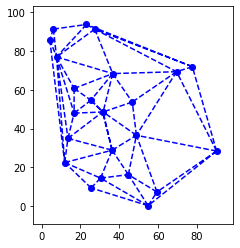

In [21]:
import matplotlib.pyplot as plt
import matplotlib.tri
import matplotlib.collections

# Create a plot with matplotlib.pyplot
fig, ax = plt.subplots()
ax.margins(0.1)
ax.set_aspect('equal')


# Plot our Delaunay triangulation (plot in blue)
cx, cy = zip(*points)
dt_tris = triangles
ax.triplot(matplotlib.tri.Triangulation(cx, cy, dt_tris), 'bo--')

Picture exists
File exists
Faces:
 [[459  84 173 173]]
File exists
File exists
landmarks LBF
 [array([[[471.72495, 165.35269],
        [475.1322 , 183.99228],
        [479.50934, 203.33925],
        [485.82346, 222.72495],
        [494.76743, 240.22565],
        [508.49847, 255.04977],
        [525.5026 , 266.0757 ],
        [543.1913 , 274.42322],
        [562.17725, 275.49762],
        [579.73486, 269.36334],
        [593.8447 , 256.90628],
        [605.2263 , 241.66316],
        [612.5518 , 222.95433],
        [614.83044, 202.86461],
        [614.78827, 183.53572],
        [614.2183 , 164.0716 ],
        [612.59357, 144.97856],
        [484.65704, 157.83023],
        [491.6081 , 146.23413],
        [505.43686, 141.90009],
        [520.23694, 143.35478],
        [533.5018 , 148.24115],
        [551.2937 , 144.51314],
        [562.5177 , 136.21062],
        [574.79517, 130.07817],
        [588.70197, 131.4138 ],
        [597.6945 , 139.62175],
        [544.17456, 156.09842],
        [

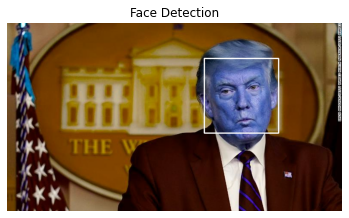

In [31]:
import cv2
import urllib.request as urlreq

# used to access local directory
import os

# used to plot our images
import matplotlib.pyplot as plt

# used to change image size
from pylab import rcParams
pics_url = "https://cdn.cnn.com/cnnnext/dam/assets/200905152308-atlantic-report-donald-trump-military-comments-sanchez-dnt-lead-vpx-00001619-exlarge-169.jpg"

# save picture's name as pic
pic = "image.jpg"

# chech if picture is in working directory
if (pic in os.listdir(os.curdir)):
    print("Picture exists")
else:
    # download picture from url and save locally as image.jpg
    urlreq.urlretrieve(pics_url, pic)
    print("Picture downloaded")

# read image with openCV
image = cv2.imread(pic)

# plot image with matplotlib package
plt.imshow(image)

# convert image to RGB colour
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot image with matplotlib package
plt.imshow(image_rgb)

# convert image to Grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# remove axes
plt.axis("off")
plt.imshow(image_gray, cmap = "gray")

haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    # download file from url and save locally as haarcascade_frontalface_alt2.xml
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(image_gray)

# Print coordinates of detected faces
print("Faces:\n", faces)
for face in faces:
#     save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
    # Draw a white coloured rectangle around each face using the face's coordinates
    # on the "image_template" with the thickness of 2 
    cv2.rectangle(image,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow(image)
plt.title('Face Detection')


# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "LFBmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "LFBmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# Detect landmarks on "image_gray"
_, landmarks = landmark_detector.fit(image_gray, faces)

# print coordinates of detected landmarks
print("landmarks LBF\n", landmarks)



In [53]:
points=np.array(landmarks).reshape(-1,2)
triangles = [] # cells
edge2Triangles = {} # edge to triangle(s) map
boundaryEdges = set()
appliedBoundaryEdges = None
holes = None

    
# compute center of gravity
cg =  np.mean(points, axis=0)

In [54]:
# sort
def distanceSquare(pt):
      d = pt - cg
      return np.dot(d, d)
points=np.array(sorted(points,key = distanceSquare))

In [55]:
# create first triangle, make sure we're getting a non-zero area otherwise
# drop the points
area = 0.0
index = 0
stop = False
while not stop and index + 2 < len(points):
      print(index)
      area = getArea(index, index + 1, index + 2)
      if abs(area) < EPS:
        del points[index]
      else:
        stop = True

0


No handles with labels found to put in legend.


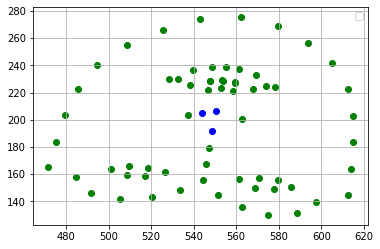

In [49]:
import matplotlib.pyplot as plt
import matplotlib.tri
import matplotlib.collections

fig, ax = plt.subplots()
ax.scatter(points[4:,0], points[4:,1], c="green")
ax.scatter(points[0:3,0], points[:3,1], c="blue")


ax.legend()
ax.grid(True)

plt.show()

In [56]:

if index <= len(points) - 3:
      tri = [index, index + 1, index + 2]
      makeCounterClockwise(tri)
      triangles.append(tri)

      # boundary edges
      e01 = (tri[0], tri[1])
      boundaryEdges.add(e01)
      e12 = (tri[1], tri[2])
      boundaryEdges.add(e12)
      e20 = (tri[2], tri[0])
      boundaryEdges.add(e20)

      e01 = makeKey(e01[0], e01[1])
      edge2Triangles[e01] = [0,]

      e12 = makeKey(e12[0], e12[1])
      edge2Triangles[e12] = [0,]

      e20 = makeKey(e20[0], e20[1])
      edge2Triangles[e20] = [0,]

else:
      # all the points fall on a line
      print('All the points fall on a line')

In [57]:
for i in range(3, len(points)):
      addPoint(i)

In [59]:
def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False

    elif point[1] < rect[1] :

        return False

    elif point[0] > rect[2] :

        return False

    elif point[1] > rect[3] :

        return False

    return True


In [51]:
def draw_delaunay(img, subdiv, delaunay_color ) :
   triangleList = subdiv.getTriangleList();
   size = img.shape
   r = (0, 0, size[1], size[0])
   for t in triangleList :
      pt1 = (t[0], t[1])
      pt2 = (t[2], t[3])
      pt3 = (t[4], t[5])
       if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
          cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.CV_AA, 0)
          cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.CV_AA, 0)
          cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.CV_AA, 0)
 


[]

In [ ]:
landmark(t[0])

In [ ]:
(landmark(t[0]), landmark(t[1]))

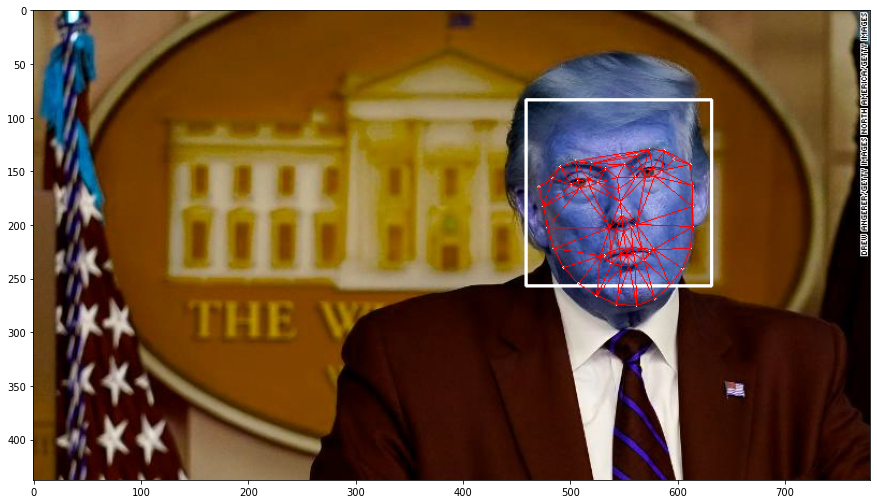

In [76]:
import matplotlib.pyplot as plt
import matplotlib.tri
import matplotlib.collections

from pylab import rcParams
rcParams['figure.figsize'] =15, 15

for landmark in landmarks:
    for x,y in landmark[0]:
		# display landmarks on "image_cropped"
		# with white colour in BGR and thickness 1
        cv2.circle(image, (x, y), 1, (255, 255, 255), 1)
# plt.axis("off")

triangleList =  triangles
size = image.shape
r = (0, 0, size[1], size[0])
for t in triangleList :
      pt1 =  (points[t[0]][0],points[t[0]][1])
      pt2 =   (points[t[1]][0],points[t[1]][1])
      pt3 =  (points[t[2]][0],points[t[2]][1])
      #if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
      cv2.line(image, pt1, pt2,  (255, 0,0))
      cv2.line(image, pt2, pt3,  (255, 0,0))
      cv2.line(image, pt3, pt1,  (255, 0,0))
 


plt.imshow(image)